## PREDICTING WIND TURBINE POWER OUTPUT FROM WIND SPEED VALUES 
## using LINEAR REGRESSION

#### Objectives
##### 1 Perform linear regression on the dataset.
##### 2 Explain what this shows.
##### 3 Predict wind speed power output from wind speed values.

#### SOURCES

https://www.w3schools.com/python/python_ml_linear_regression.asp
I did the tutorial on this site and because you can see worked examples it
is very helpful.  I used the LinearRegression method from this site for my
first example and to find the R² value.
    
https://realpython.com/linear-regression-in-python/#regression
I also did the tutorial in this site to gain a better understanding of the task.
    
https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
This site has a example of linear regression which was useful to refer to.
    
https://scipy-lectures.org/packages/scikit-learn/index.html
I did the first section of this tutorial about machine learning and the purposes
of linear regression in training datasets.

https://www.oreilly.com/library/view/machine-learning-with/9781491989371/ch01.html
I used this site to help me tranform data from list to array.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html
Scipy documentation on Pearson's r, not as helpful as the following site.
      
https://realpython.com/numpy-scipy-pandas-correlation-python
I found and used information from this site about tests to correlate two variables.
I used Pearson's r, Spearman's rho and Kendall's tau to measure the correlation between
wind speed and power output.
    
https://www.w3schools.com/python/python_ml_polynomial_regression.asp
I did this tutorial and again found it helpful to do some worked examples before doing my
own in my Jupyter notebook.



##### Note
The speed variable is sometimes referred to as x, when it is changed to a 1D array it is speed_data_array.
The power variable is sometimes referred to as y, when it is changed to a 1D array it is power_data_array.




### IMPORTING AND PLOTTING THE DATASET

In [1]:
# importing library and dataset, which I call dfpower.
import pandas as pd

dfpower = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")

# examining what type is our data.
dfpower.dtypes


speed    float64
power    float64
dtype: object

In [2]:
# looking at the heads and ends of dataset.
print(dfpower)

      speed  power
0     0.000    0.0
1     0.125    0.0
2     0.150    0.0
3     0.225    0.0
4     0.275    0.0
..      ...    ...
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0

[500 rows x 2 columns]


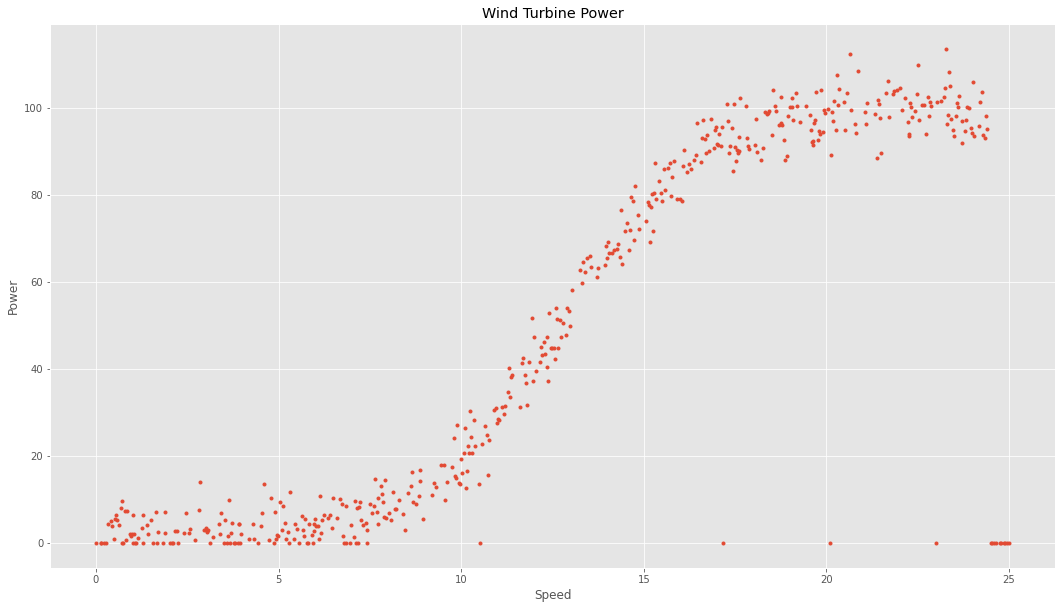

In [3]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np

# x = speed, y= power
x = dfpower.iloc[:,[0]]
y = dfpower.iloc[:,[1]]

# plot each (x,y) sample on graph.
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (18,10)
plt.title("Wind Turbine Power")
plt.xlabel("Speed")
plt.ylabel("Power")
plt.plot(x, y, '.')




### USING SKLEARN LINEARREGRESSION TO FIND THE RELATIONSHIP BETWEEN X & Y - Objective 1

In [4]:
# import library
from sklearn.linear_model import LinearRegression

# x = speed and y = power from the dataframe dfpower
x = dfpower.iloc[:,[0]]
y = dfpower.iloc[:,[1]]

# create the variable model as the instance of LinearRegression
model=LinearRegression()

# call .fit on the model which calculates the optimal values of the 
# weights bo (the intercept of the y axis) and b1 (slope of the estimated
# regression line)
model.fit(x,y)

# r_sq is the proportion of the variance for a dependent variable that may
# be explained by the influence of independent variable(s)
# calling .score returns the coefficient of determination (r_sq)
r_sq = model.score(x,y)

# the closer the coefficient of determination is to 1 the better the fit,
# because it indicates the sum of squared residuals (SSR) is 0 which is perfect. 
print("coefficient of determination:", r_sq)

# .intercept is the intercept of y axis, bo
print("intercept:", model.intercept_)

# .coef is the slope of regression line, b1.
print("slope:", model.coef_)

coefficient of determination: 0.7289360258564073
intercept: [-13.89990263]
slope: [[4.91759567]]


In [5]:
# We can now use the y intercept and the slope multiplied by each value
# of x in turn to predict y (y_pred), this is basically the equation of the line.

y_pred = model.intercept_+ model.coef_ * x
print("predicted response:",y_pred)

predicted response:           speed
0    -13.899903
1    -13.285203
2    -13.162263
3    -12.793444
4    -12.547564
..          ...
495  107.933530
496  108.302350
497  108.425290
498  108.794109
499  109.039989

[500 rows x 1 columns]


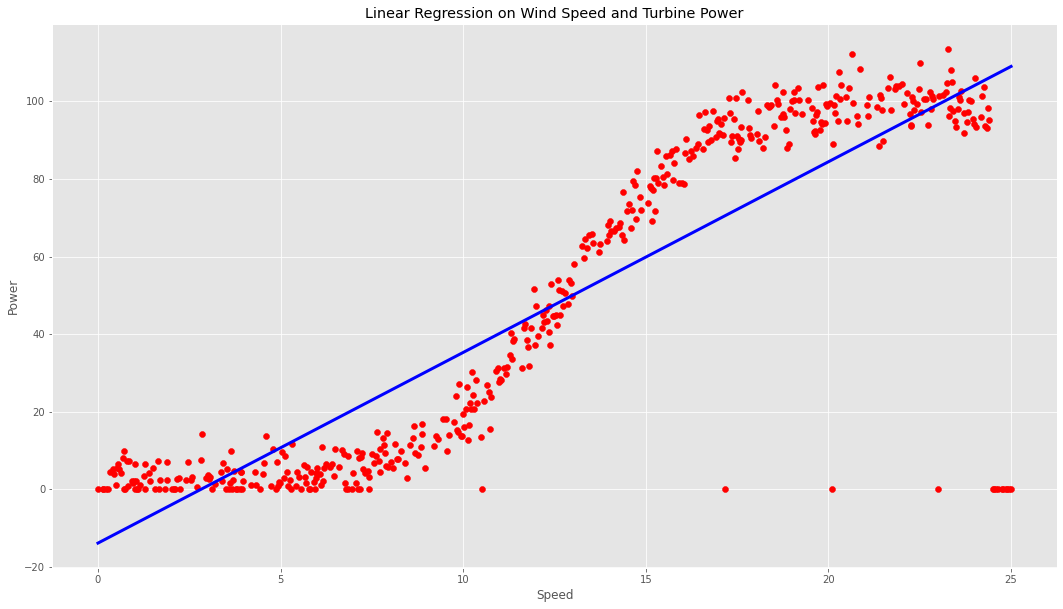

In [6]:

# Plot outputs of the x and y values as red dots and the x and y_pred
# as a blue line.
plt.scatter(x, y,  color='red')
plt.plot(x, y_pred, color='blue', linewidth=3)

plt.title("Linear Regression on Wind Speed and Turbine Power")
plt.xlabel("Speed")
plt.ylabel("Power")

plt.show()




### USING POLYFIT TO FIND THE RELATIONSHIP BETWEEN X & Y - Objective 1 (Method 2)

In [7]:
# Using polyfit to find the relationship between the x and y variables
import numpy as np

# polyfit expects x to be a 1D vector, convert x to an np.array called speed_data_array.
speed_data = dfpower["speed"]
#print("Original List:", speed_data)

speed_data_array = np.array(speed_data)
#print("One-dimensional NumPy array: ", speed_data_array)

# this will return an array which includes the coefficients; aka the intercept of y axis, bo and
# the slope of regression line, b1.  These are the same figures as I produced using LinearRegression.
np.polyfit(speed_data_array,y,1)


array([[  4.91759567],
       [-13.89990263]])

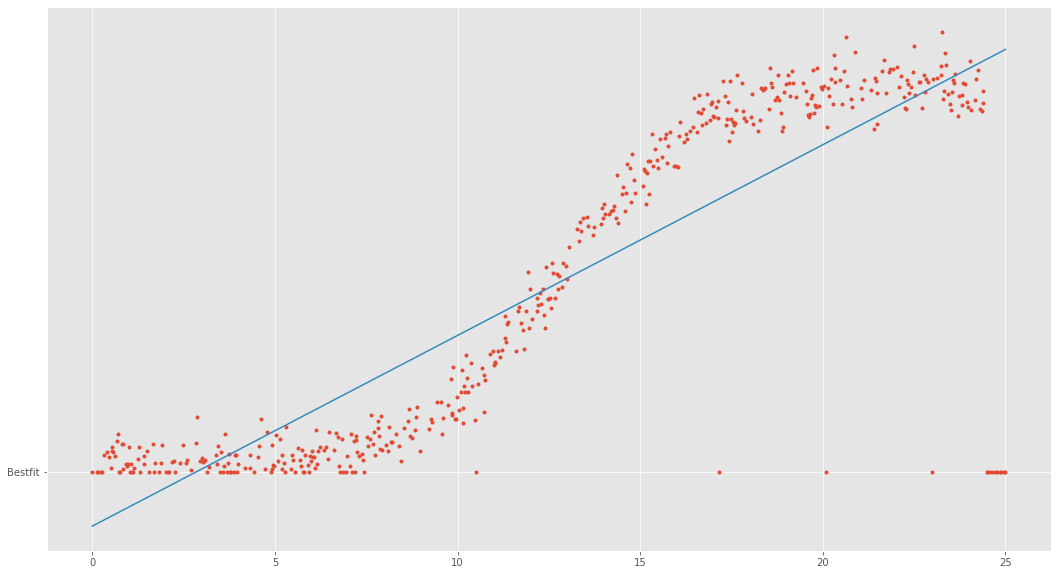

In [8]:
# In linear regression coefficients are the values that multiply the predictor (x) values.
coeffs = np.polyfit(speed_data_array,y,1)

# This plots the original data.
plt.plot(speed_data_array,y,".", label="Data")

# This plots the best fit line.
plt.plot(speed_data_array, coeffs[0]*speed_data_array+coeffs[1], "-","Bestfit")

# Again the plot is the same as the one produced using LinearRegression.

In [9]:
# Calculating the cost of the line
# Cost(m,c)= Σ(yi - mxi-c)² where m is the slope and c is the constant
# This is the same idea as polyfit and produces the same results.

# To use this method I have had to take the values of x(speed) and y(power) out of the dataframe and use
# them as an array
x_avg = np.mean(dfpower["speed"])
y_avg = np.mean(dfpower["power"])

# subtract the means from speed (x) and power (y)
x_zero = dfpower["speed"] - x_avg

y_zero = dfpower["power"] - y_avg


# to calculate the best m (slope)
m = np.sum(x_zero * y_zero) / np.sum(x_zero * x_zero)

# to calculate the best c (y intercept)
c = y_avg - m * x_avg

print("m is %8.6f and c is %6.6f." % (m,c))


m is 4.917596 and c is -13.899903.




### INTERPRETING THE DATA - Objective 2


#### Three tests to find the correlation coefficient between speed and power.

In [10]:
# The Pearson correlation coefficient measures the linear relationship
# between two datasets.  Positive correlations imply that as x increases
# so does y, negative correlations imply that if x increases, y decreases.

import numpy as np 
import scipy.stats

# Changing the speed (x) value from dataframe to array.
speed_data = dfpower["speed"]
speed_data_array = np.array(speed_data)

# Changing the power (y) value from dataframe to array.
power_data = dfpower["power"]
power_data_array = np.array(power_data)

scipy.stats.pearsonr(speed_data_array,power_data_array)

# The first value is Pearson's r, this value implies a strong
# positive correlation between wind speed and turbine power output.
# The second value is the p-value which is used to test a hypothesis.

(0.8537775037188595, 2.8596889641534797e-143)

In [11]:
# The Spearman correlation coefficient measures the linear relationship
# between two datasets.  Positive correlations imply that as x increases
# so does y, negative correlations imply that if x increases, y decreases.

scipy.stats.spearmanr(speed_data_array,power_data_array)

# The first value is Spearman's rho, this value implies a strong
# positive correlation between wind speed and turbine power output.
# The second value is the p-value which is used to test a hypothesis.

SpearmanrResult(correlation=0.8187276026588616, pvalue=4.4287029757150813e-122)

In [12]:
# The Kendall correlation coefficient measures the linear relationship
# between two datasets.  Positive correlations imply that as x increases
# so does y, negative correlations imply that if x increases, y decreases.

scipy.stats.kendalltau(speed_data_array,power_data_array)

# The first value is Kendall's tau, this value implies a strong
# positive correlation between wind speed and turbine power output.
# The second value is the p-value which is used to test a hypothesis.

KendalltauResult(correlation=0.7275042154337987, pvalue=1.630169049999099e-129)

##### There is a high correlation coefficient between wind speed, x, and power production, y.
The values range from 0.73 on the Kendall tau to the highest correlation 0.85 on
the Pearson's r.


Source  https://enerpower.ie/portfolio/wind-turbine-faq-ireland/
    
How strong does the wind have to blow for the wind turbines to work?

"Wind turbines typically start operating at wind speeds around Beaufort Force 3 
(which is around 3-5 metres per second (m/s), or 8-12 miles per hour (mph). 
Turbines reach maximum power output at Beaufort 5 (around 11-14 m/s or 25-30 mph). 
At very high wind speeds, i.e. Beaufort Storm Force 10 winds, (around 24 m/s or 55 mph) 
or greater the wind turbines shut down to prevent excessive wear and tear. 
Since winds of this strength occur only for a handful of hours per year, 
very little energy is lost in high wind periods."
 
The information contained in this faq, from a wind energy company Enerpower, shows us how to interpret
our plot.  The illustrated data shows that no power is produced until the wind speed reaches 
8 mph, at 20-25 mph it has reached peak production and levels off.  Winds above 20 mph on our plot seem
to indicate the best speed for producing power.  Higher wind speeds do not produce more power.  As the faq
from Enerpower indicate, a turbine will turn itself off in storm force winds.
 
Having analysed this data we have the following information to help predict a y value from an x value.
 
coefficient of determination: 0.7289360258564073
intercept: 13.89990263
slope: 4.91759567
Pearson's r = 0.8537775037188595 







### PREDICT WIND TURBINE POWER OUTPUT FROM WIND SPEED VALUES - Objective 3

In [13]:
# Using the equation of the line to predict y for 10 selected values of x.
# y1 = mx1 + c, if x1 = 2, find y.
# x = speed, y = power.

x1 = [2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0]
y1 = [4.91759567 * i - 13.89990267 for i in x1]

print(x1)
print(y1)


[2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0]
[-4.06471133, 5.77048001, 15.605671349999998, 25.44086269, 35.27605403, 45.11124536999999, 54.94643671, 64.78162805, 74.61681938999999, 84.45201073]


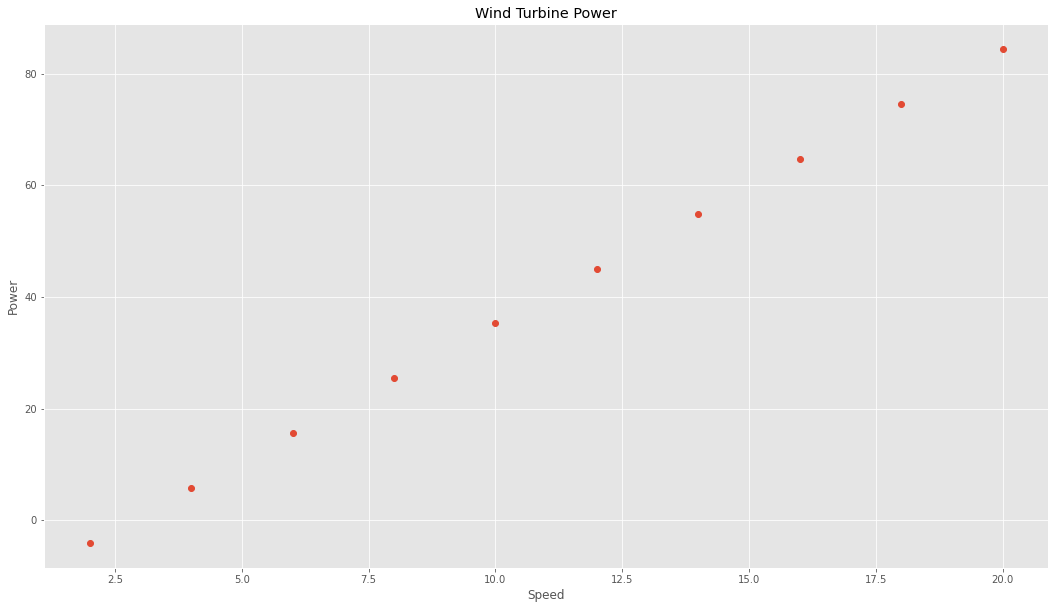

In [14]:
# Plot the selected points.

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (18,10)
plt.title("Wind Turbine Power")
plt.xlabel("Speed")
plt.ylabel("Power")
plt.plot(x1, y1, 'o')


# The plot shows the positive correlation between values of x1,
# the sample of speed variables and y1, the sample of turbine power output.

The arrangement of the points shows a positive correlation but it
must also take into account that there is a horizontal section before
0-7mph and after 20mph.  There must be a windspeed of 7+ for power to be
produced and speeds over 20mph do not produce more power.

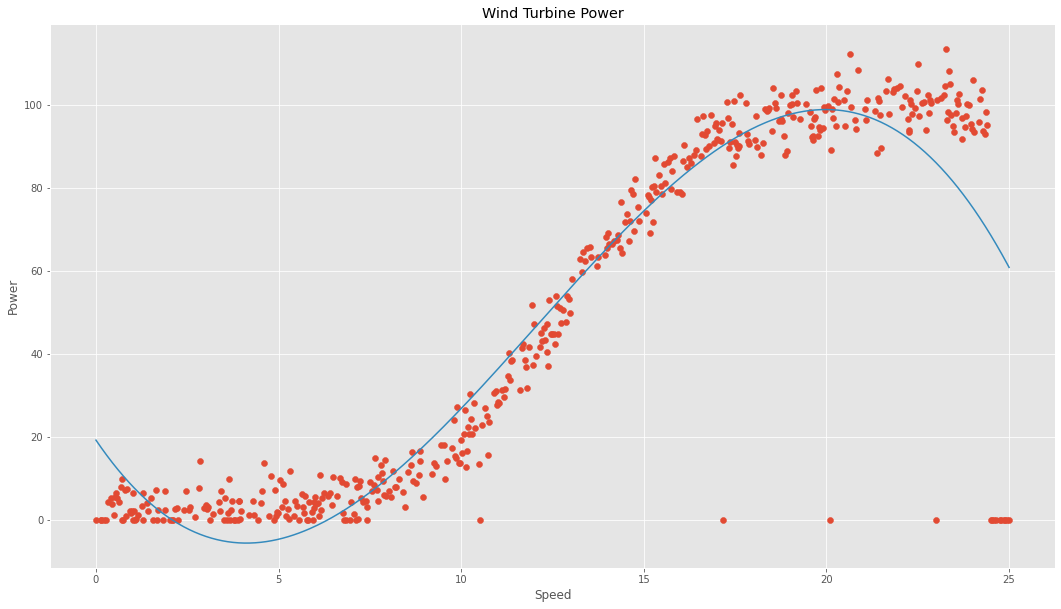

In [15]:
# See if Polynomial Regression produces a better correlation between speed and power.

# x = speed, y= power
x = dfpower.iloc[:,[0]]
y = dfpower.iloc[:,[1]]

# plot each (x,y) sample on graph.
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (18,10)
plt.title("Wind Turbine Power")
plt.xlabel("Speed")
plt.ylabel("Power")
plt.plot(x, y, '.')

# Draw the line of polynomial regression using the 1D values for speed an power.
import numpy as np

# Use the numpy method to make a polynomial regression model.
mymodel = np.poly1d(np.polyfit(speed_data_array, power_data_array, 3))

# plot 500 points in the sample from the first x value, 0, to the last x value, 25.
myline = np.linspace(0, 25, 500)

# plot the data showing the sample and the polynomial line of regression.
plt.scatter(speed_data_array, power_data_array)
plt.plot(myline, mymodel(myline))
plt.show() 

In [16]:
# Calculate the coefficient of determination of the data.
import numpy as np
from sklearn.metrics import r2_score

# use the polyfit method to find the coefficient of determination or R².

mymodel = np.poly1d(np.polyfit(speed_data_array, power_data_array, 3))

print(r2_score(power_data_array, mymodel(speed_data_array)))

0.8796883953739737


##### R²

In a sample of 500 elements where the wind speed (x with values from 0 to 25) produces a power output (y) the y variable is 
dependent on the x variable.
Using the Linear Regression model I found the coefficient of determination to be 0.7289360258564073, this shows a high
positive correlation.
Using the Polynomial Regression model I found the coefficient of determination to be 0.8796883953739737, this indicates
that polynomial regression modelling is more effective as it shows a higher correlation between x and y.
The coefficient of determination or R² is the proportion of the variance for a dependent variable that may
be explained by the influence of independent variable(s).  The closer the coefficient of determination is to 1 the better the fit,
because it indicates the sum of squared residuals (SSR) is 0 which is perfect. 

We know from the outset that the variables have a close correlation because no one would pay the huge cost of turbines if 
they did not produce power but my research was to establish the relationship between the two and to plot and test that 
relationship.

##### Results
1. Established a relationship between wind speed and power output using LinearRegression and Polyfit.
2. Explained the purpose of Linear Regression and what my data shows.
3. Used values of x to predict values of y.
4. Created a Polynomial Regression model to show that this is a better method of analysing the data.